# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import os
import random
from scipy.stats import linregress
from pprint import pprint
import json

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(citipy)

<module 'citipy.citipy' from '/Users/hasti/opt/anaconda3/lib/python3.7/site-packages/citipy/citipy.py'>


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

In [4]:
# Loop through the list of cities and perform a request for data on each

print('Beginning Data Retrieval')     
print('-----------------------------')
i=0 

for city in cities:
    #print(f"query_url is : {query_url}")
    response =requests.get(query_url + city).json()
    #print(f"response is : {response}")
    cod = response['cod']
    if cod == 200: 
        i = i + 1
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        print(f'Processing Record {i} of Set 1 | {city}')
        
        # pause looping for a seconds
        time.sleep(0.60)
        
    else:
        print(f'City not found. Skipping...')
        

    
print(f'-----------------------------')
print(f'Data Retrieval Complete     ')
print(f'-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | boyuibe
Processing Record 2 of Set 1 | tilichiki
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | barra da estiva
Processing Record 5 of Set 1 | deputatskiy
Processing Record 6 of Set 1 | vardo
Processing Record 7 of Set 1 | poum
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | beatrice
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | kavieng
Processing Record 14 of Set 1 | zabol
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | kita
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | nelson bay
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | salalah
Processing Record 22 of Set 1 | iqaluit
City not found. Skipping...
Processing Rec

Processing Record 183 of Set 1 | itaqui
Processing Record 184 of Set 1 | tabuk
Processing Record 185 of Set 1 | boueni
Processing Record 186 of Set 1 | alekseyevsk
Processing Record 187 of Set 1 | san luis
Processing Record 188 of Set 1 | nabire
Processing Record 189 of Set 1 | sisimiut
Processing Record 190 of Set 1 | neya
Processing Record 191 of Set 1 | atasu
Processing Record 192 of Set 1 | poli
City not found. Skipping...
Processing Record 193 of Set 1 | fairbanks
Processing Record 194 of Set 1 | kudahuvadhoo
City not found. Skipping...
Processing Record 195 of Set 1 | cockburn town
Processing Record 196 of Set 1 | tuatapere
Processing Record 197 of Set 1 | sokolo
Processing Record 198 of Set 1 | dunedin
Processing Record 199 of Set 1 | alugan
Processing Record 200 of Set 1 | podgornoye
Processing Record 201 of Set 1 | beyneu
Processing Record 202 of Set 1 | bethlehem
Processing Record 203 of Set 1 | manta
Processing Record 204 of Set 1 | harrison
Processing Record 205 of Set 1 | 

City not found. Skipping...
Processing Record 366 of Set 1 | kaeo
City not found. Skipping...
Processing Record 367 of Set 1 | cabo san lucas
Processing Record 368 of Set 1 | cidreira
Processing Record 369 of Set 1 | chor
Processing Record 370 of Set 1 | nanchang
Processing Record 371 of Set 1 | gorom-gorom
Processing Record 372 of Set 1 | rio brilhante
Processing Record 373 of Set 1 | paamiut
Processing Record 374 of Set 1 | mikuni
City not found. Skipping...
Processing Record 375 of Set 1 | tura
Processing Record 376 of Set 1 | codrington
Processing Record 377 of Set 1 | chapais
Processing Record 378 of Set 1 | colares
Processing Record 379 of Set 1 | selikhino
City not found. Skipping...
Processing Record 380 of Set 1 | canmore
Processing Record 381 of Set 1 | fortuna
Processing Record 382 of Set 1 | tanout
Processing Record 383 of Set 1 | kawalu
Processing Record 384 of Set 1 | kincardine
Processing Record 385 of Set 1 | oktyabrskoye
Processing Record 386 of Set 1 | cherdakly
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
 weather_dict = {
    "City": City,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('WeatherPy_data.csv')

# print lengh of each list 
print(f'City          {len(City)}')
print(f'Cloudiness    {len(Cloudiness)}')
print(f'Country    {len(Country)}')
print(f'Date    {len(Date)}')
print(f'Humidity    {len(Humidity)}')
print(f'Lat    {len(Lat)}')
print(f'Lng    {len(Lng)}')
print(f'Max Temp    {len(Max_Temp)}')
print(f'Wind Speed    {len(Wind_Speed)}')

City          544
Cloudiness    544
Country    544
Date    544
Humidity    544
Lat    544
Lng    544
Max Temp    544
Wind Speed    544


In [6]:
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Boyuibe,0,BO,1586629014,25,-20.42,-63.28,27.54,3.02
1,Tilichiki,3,RU,1586628782,89,60.47,166.10,-17.49,2.87
2,Punta Arenas,40,CL,1586628830,66,-53.15,-70.92,9.00,8.70
3,Barra da Estiva,78,BR,1586629017,60,-13.63,-41.33,24.86,1.65
4,Deputatsky,93,RU,1586628728,92,69.30,139.90,-5.55,6.55


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

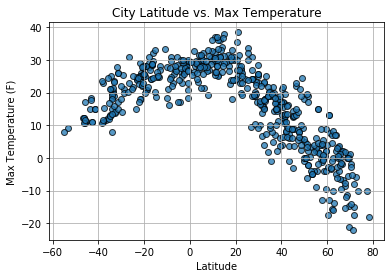

In [12]:
plt.title('City Latitude vs. Max Temperature')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.scatter(Lat, Max_Temp, marker="o", alpha=.75, edgecolors="k")
plt.grid()

plt.savefig('max_temperature')
plt.show()

#### Latitude vs. Humidity Plot

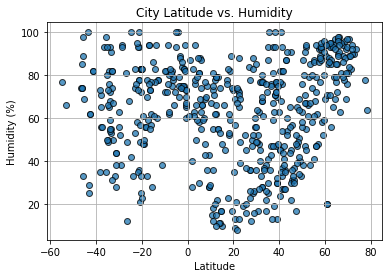

In [8]:
plt.title('City Latitude vs. Humidity')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


plt.scatter(Lat, Humidity, marker="o", alpha=.75, edgecolors="k")
plt.grid()

plt.savefig('Humidity')
plt.show()

#### Latitude vs. Cloudiness Plot

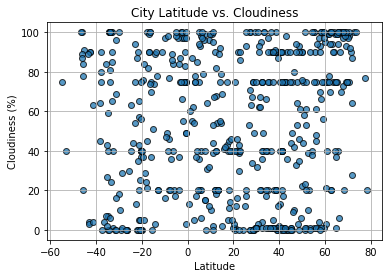

In [9]:
plt.title('City Latitude vs. Cloudiness')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


plt.scatter(Lat, Cloudiness, marker="o", alpha=.75, edgecolors="k")
plt.grid()

plt.savefig('Cloudiness')
plt.show()

#### Latitude vs. Wind Speed Plot

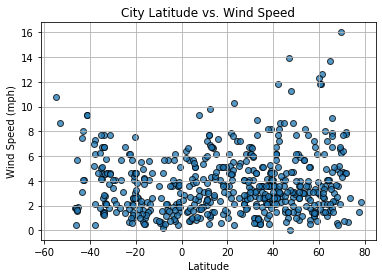

In [10]:
plt.title('City Latitude vs. Wind Speed')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


plt.scatter(Lat, Wind_Speed, alpha=.75, edgecolors="k")
plt.grid()

plt.savefig('Speed Plot')
plt.show()


# Conclusions:

The Win speed along Latitude chart shows that the win speed is not too related to the latitude. Most of our sample cities have low wind speed.

## Linear Regression

# OPTIONAL

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
#xlat= cities["Lat"] >= 0
northern_hemisphere= cities.Loc[cities["Lat"]>=0]
northern.reset_index(inplace=True)

southern_hemisphere= cities.Loc[cities["Lat"]<0]
southern.reset_index(inplace=True)

In [ ]:
# Create Northern and Southern Hemisphere DataFrames
 #Define plotting function

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values=northern_hemisphere["Latitude"]
y_values=northern_hemisphere["Max Temp "]
plt.title('City Latitude vs. Max Temp({})'.format(date))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

reg_line=linear_Regression(x_values,y_values,plt.title,plt.xlabel,plt.ylabel)
print(reg_line)


plt.savefig('NH_Linear_LvsMT')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values=southern_hemisphere["Latitude"]
y_values=southern_hemisphere["Max Temp "]
plt.title('City Latitude vs. Max Temp({})'.format(date))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

reg_line=linear_Regression(x_values,y_values,plt.title,plt.xlabel,plt.ylabel)
print(reg_line)


plt.savefig('SH_Linear_LvsMT')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values=northern_hemisphere["Latitude"]
y_values=northern_hemisphere["Humidity (%) "]
plt.title('City Latitude vs. Humidity (%) ({})'.format(date))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

reg_line=linear_Regression(x_values,y_values,plt.title,plt.xlabel,plt.ylabel)
print(reg_line)


plt.savefig('NH_Linear_LvsH')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values=southern_hemisphere["Latitude"]
y_values=southern_hemisphere["Humidity (%) "]
plt.title('City Latitude vs. Humidity (%) ({})'.format(date))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

reg_line=linear_Regression(x_values,y_values,plt.title,plt.xlabel,plt.ylabel)
print(reg_line)


plt.savefig('SH_Linear_LvsH')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values=northern_hemisphere["Latitude"]
y_values=northern_hemisphere["Cloudiness (%) "]
plt.title('City Latitude vs. Cloudiness(%) ({})'.format(date))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%) ")

reg_line=linear_Regression(x_values,y_values,plt.title,plt.xlabel,plt.ylabel)
print(reg_line)


plt.savefig('NH_Linear_LvsC')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values=southern_hemisphere["Latitude"]
y_values=southern_hemisphere["Cloudiness (%) "]
plt.title('City Latitude vs. Cloudiness(%) ({})'.format(date))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%) ")

reg_line=linear_Regression(x_values,y_values,plt.title,plt.xlabel,plt.ylabel)
print(reg_line)


plt.savefig('SH_Linear_LvsC')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values=northern_hemisphere["Latitude"]
y_values=northern_hemisphere["Wind Speed (mph)"]
plt.title('City Latitude vs. Wind Speed ({})'.format(date))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

reg_line=linear_Regression(x_values,y_values,plt.title,plt.xlabel,plt.ylabel)
print(reg_line)


plt.savefig('NH_Linear_LvsW')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values=southern_hemisphere["Latitude"]
y_values=southern_hemisphere["Wind Speed (mph)"]
plt.title('City Latitude vs. Wind Speed ({})'.format(date))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

reg_line=linear_Regression(x_values,y_values,plt.title,plt.xlabel,plt.ylabel)
print(reg_line)


plt.savefig('SH_Linear_LvsW')
plt.show()